This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 148us/sample - loss: 0.6223 - acc: 0.8129 - val_loss: 0.2813 - val_acc: 0.9197
Epoch 2/10
48000/48000 [==============================] - 1s 22us/sample - loss: 0.2438 - acc: 0.9243 - val_loss: 0.2066 - val_acc: 0.9368
Epoch 3/10
48000/48000 [==============================] - 1s 24us/sample - loss: 0.1583 - acc: 0.9509 - val_loss: 0.1374 - val_acc: 0.9592
Epoch 4/10
48000/48000 [==============================] - 1s 24us/sample - loss: 0.1133 - acc: 0.9648 - val_loss: 0.1349 - val_acc: 0.9618
Epoch 5/10
48000/48000 [==============================] - 1s 25us/sample - loss: 0.0811 - acc: 0.9742 - val_loss: 0.1363 - val_acc: 0.9621
Epoch 6/10
48000/48000 [==============================] - 1s 24us/sample - loss: 0.0608 - acc: 0.9805 - val_loss: 0.1521 - val_acc: 0.9592
Epoch 7/10
48000/48000 [==============================] - 1s 24us/sample - loss: 0.0446 - acc: 0.9853 - val_loss: 0

**Plotting a validation accuracy comparison**

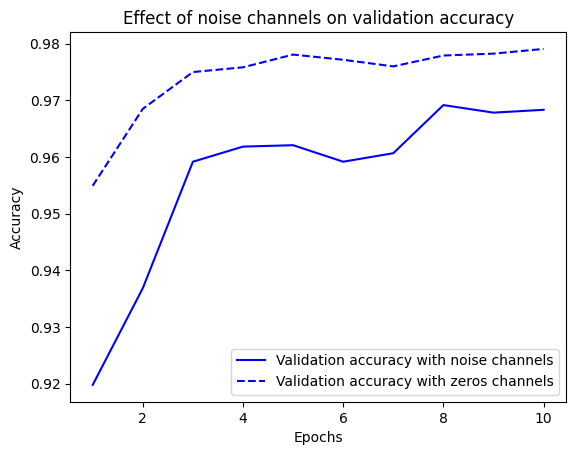

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_acc"]
val_acc_zeros = history_zeros.history["val_acc"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

#print(dir(model))

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_activity_regularizer', '_add_inbound_node', '_add_unique_metric_name', '_add_variable_with_custom_getter', '_all_metrics_tensors', '_all_stateful_metrics_tensors', '_base_init', '_build_input_shape', '_cache_output_metric_attributes', '_call_and_compute_mask', '_call_convention', '_call_is_graph_friendly', '_check_trainable_weights_consistency', '_checkpoint_dependencies', '_checkpointable_saver', '_clear_losses', '_compute_output_and_mask_jointly', '_dataset_iterator_cache', '_default_save_signature', '_deferred_dependencies', '_determine_call_convention', '_distribution_standardize_user_data', '_distribution_strategy', '_dtype', '_

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 16us/sample - loss: 14.4310 - acc: 0.1026 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 2/10
48000/48000 [==============================] - 1s 13us/sample - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 3/10
48000/48000 [==============================] - 1s 14us/sample - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 4/10
48000/48000 [==============================] - 1s 14us/sample - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 5/10
48000/48000 [==============================] - 1s 13us/sample - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 6/10
48000/48000 [==============================] - 1s 13us/sample - loss: 14.4764 - acc: 0.1019 - val_loss: 14.4499 - val_acc: 0.1035
Epoch 7/10
48000/48000 [==============================] - 1s 13us/sample - loss: 14.4764 - acc: 0.1019 -

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 15us/sample - loss: 0.4411 - acc: 0.9067 - val_loss: 0.1829 - val_acc: 0.9506
Epoch 2/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.1463 - acc: 0.9639 - val_loss: 0.1659 - val_acc: 0.9643
Epoch 3/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.1172 - acc: 0.9729 - val_loss: 0.1542 - val_acc: 0.9700
Epoch 4/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.1020 - acc: 0.9780 - val_loss: 0.2199 - val_acc: 0.9625
Epoch 5/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.0909 - acc: 0.9812 - val_loss: 0.2030 - val_acc: 0.9677
Epoch 6/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.0860 - acc: 0.9837 - val_loss: 0.2244 - val_acc: 0.9693
Epoch 7/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.0867 - acc: 0.9850 - val_loss: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 13us/sample - loss: 0.6735 - acc: 0.8324 - val_loss: 0.3594 - val_acc: 0.9047
Epoch 2/20
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3514 - acc: 0.9030 - val_loss: 0.3083 - val_acc: 0.9144
Epoch 3/20
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3154 - acc: 0.9125 - val_loss: 0.2935 - val_acc: 0.9181
Epoch 4/20
48000/48000 [==============================] - 1s 12us/sample - loss: 0.2995 - acc: 0.9164 - val_loss: 0.2827 - val_acc: 0.9208
Epoch 5/20
48000/48000 [==============================] - 1s 12us/sample - loss: 0.2898 - acc: 0.9185 - val_loss: 0.2766 - val_acc: 0.9241
Epoch 6/20
48000/48000 [==============================] - 1s 12us/sample - loss: 0.2831 - acc: 0.9209 - val_loss: 0.2729 - val_acc: 0.9253
Epoch 7/20
48000/48000 [==============================] - 1s 12us/sample - loss: 0.2780 - acc: 0.9224 - val_loss: 0.

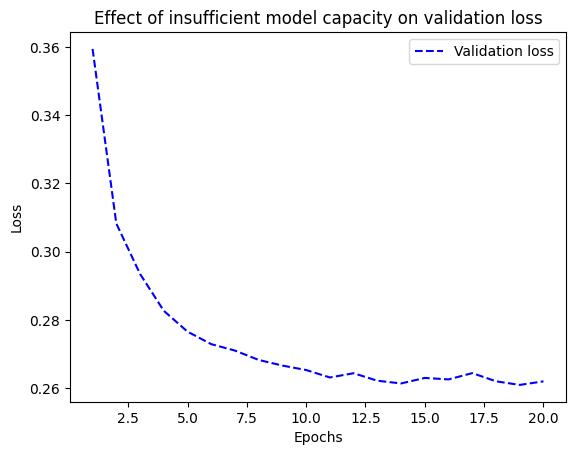

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 20us/sample - loss: 0.3511 - acc: 0.8995 - val_loss: 0.1829 - val_acc: 0.9485
Epoch 2/20
48000/48000 [==============================] - 1s 15us/sample - loss: 0.1566 - acc: 0.9532 - val_loss: 0.1330 - val_acc: 0.9611
Epoch 3/20
48000/48000 [==============================] - 1s 14us/sample - loss: 0.1098 - acc: 0.9676 - val_loss: 0.1129 - val_acc: 0.9681
Epoch 4/20
48000/48000 [==============================] - 1s 14us/sample - loss: 0.0845 - acc: 0.9745 - val_loss: 0.1071 - val_acc: 0.9688
Epoch 5/20
48000/48000 [==============================] - 1s 14us/sample - loss: 0.0674 - acc: 0.9797 - val_loss: 0.1034 - val_acc: 0.9711
Epoch 6/20
48000/48000 [==============================] - 1s 14us/sample - loss: 0.0561 - acc: 0.9827 - val_loss: 0.0915 - val_acc: 0.9738
Epoch 7/20
48000/48000 [==============================] - 1s 14us/sample - loss: 0.0463 - acc: 0.9854 - val_loss: 0.

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

C:\Users\user\anaconda3\envs\DL\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\envs\DL\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
15000/15000 [==============================] - 2s 120us/sample - loss: 0.5075 - acc: 0.7809 - val_loss: 0.3902 - val_acc: 0.8521
Epoch 2/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.2979 - acc: 0.9038 - val_loss: 0.3091 - val_acc: 0.8806
Epoch 3/20
15000/15000 [==============================] - 1s 86us/sample - loss: 0.2188 - acc: 0.9297 - val_loss: 0.2816 - val_acc: 0.8867
Epoch 4/20
15000/15000 [==============================] - 1s 88us/sample - loss: 0.1711 - acc: 0.9443 - val_loss: 0.2984 - val_acc: 0.8804
Epoch 5/20
15000/15000 [==============================] - 1s 87us/sample - loss: 0.1372 - acc: 0.9561 - val_loss: 0.2952 - val_acc: 0.8861
Epoch 6/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.1123 - acc: 0.9647 - val_loss: 0.3469 - val_acc: 0.8718
Epoch 7/20
15000/15000 [==============================] - 1s 88us/s

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 108us/sample - loss: 0.6223 - acc: 0.6323 - val_loss: 0.5756 - val_acc: 0.6643
Epoch 2/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.5297 - acc: 0.7720 - val_loss: 0.5346 - val_acc: 0.7389
Epoch 3/20
15000/15000 [==============================] - 1s 89us/sample - loss: 0.4794 - acc: 0.8505 - val_loss: 0.4989 - val_acc: 0.8408
Epoch 4/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.4436 - acc: 0.8873 - val_loss: 0.4901 - val_acc: 0.8258
Epoch 5/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.4159 - acc: 0.9110 - val_loss: 0.4699 - val_acc: 0.8654
Epoch 6/20
15000/15000 [==============================] - 1s 83us/sample - loss: 0.3926 - acc: 0.9279 - val_loss: 0.4613 - val_acc: 0.8702
Epoch 7/20
15000/15000 [==============================] - 1s 89us/sample - loss: 0.3714 - acc: 0.9424 - val_loss: 0

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 110us/sample - loss: 0.5534 - acc: 0.7469 - val_loss: 0.3141 - val_acc: 0.8743
Epoch 2/20
15000/15000 [==============================] - 1s 82us/sample - loss: 0.2494 - acc: 0.9049 - val_loss: 0.3422 - val_acc: 0.8500
Epoch 3/20
15000/15000 [==============================] - 1s 81us/sample - loss: 0.1507 - acc: 0.9425 - val_loss: 0.2984 - val_acc: 0.8922
Epoch 4/20
15000/15000 [==============================] - 1s 86us/sample - loss: 0.1047 - acc: 0.9651 - val_loss: 0.3438 - val_acc: 0.8706
Epoch 5/20
15000/15000 [==============================] - 1s 88us/sample - loss: 0.0811 - acc: 0.9785 - val_loss: 0.3121 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 1s 88us/sample - loss: 0.0069 - acc: 0.9996 - val_loss: 0.4853 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 100us/sample - loss: 8.3856e-04 - acc: 0.9999 - val_lo

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.6037 - acc: 0.7865 - val_loss: 0.4931 - val_acc: 0.8546
Epoch 2/20
15000/15000 [==============================] - 1s 93us/sample - loss: 0.4135 - acc: 0.8923 - val_loss: 0.4217 - val_acc: 0.8668
Epoch 3/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.3437 - acc: 0.9114 - val_loss: 0.3731 - val_acc: 0.8859
Epoch 4/20
15000/15000 [==============================] - 1s 100us/sample - loss: 0.3082 - acc: 0.9235 - val_loss: 0.3655 - val_acc: 0.8860
Epoch 5/20
15000/15000 [==============================] - 1s 86us/sample - loss: 0.2861 - acc: 0.9301 - val_loss: 0.3598 - val_acc: 0.8861
Epoch 6/20
15000/15000 [==============================] - 1s 88us/sample - loss: 0.2698 - acc: 0.9345 - val_loss: 0.3847 - val_acc: 0.8742
Epoch 7/20
15000/15000 [==============================] - 1s 85us/sample - loss: 0.2592 - acc: 0.9403 - val_loss: 0

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 108us/sample - loss: 0.6192 - acc: 0.6461 - val_loss: 0.4983 - val_acc: 0.8552
Epoch 2/20
15000/15000 [==============================] - 1s 99us/sample - loss: 0.4942 - acc: 0.7698 - val_loss: 0.3929 - val_acc: 0.8723
Epoch 3/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.4179 - acc: 0.8211 - val_loss: 0.3241 - val_acc: 0.8852
Epoch 4/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.3548 - acc: 0.8626 - val_loss: 0.2999 - val_acc: 0.8799
Epoch 5/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.3082 - acc: 0.8901 - val_loss: 0.2790 - val_acc: 0.8923
Epoch 6/20
15000/15000 [==============================] - 1s 100us/sample - loss: 0.2668 - acc: 0.9099 - val_loss: 0.2972 - val_acc: 0.8847

## Summary

In [21]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

In [22]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model



In [23]:
model = build_model()
model.fit(train_data, train_labels,
          epochs=130, batch_size=512, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 3s 124us/sample - loss: 0.1200 - mean_absolute_error: 0.1832


In [24]:
test_mae_score

0.18316545

In [25]:

predictions = model.predict(test_data)
predictions[0]

array([0.6595273], dtype=float32)

In [27]:
len(predictions)

25000